In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df = df.drop(columns=['customerID'])

In [5]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [6]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [7]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [8]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

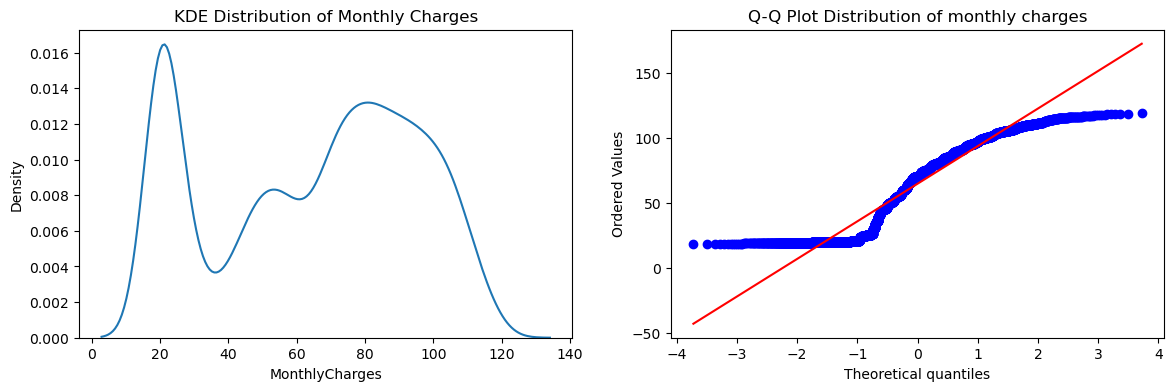

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(df['MonthlyCharges'])
plt.title('KDE Distribution of Monthly Charges')

plt.subplot(122)
stats.probplot(df['MonthlyCharges'], dist= 'norm', plot = plt)
plt.title('Q-Q Plot Distribution of monthly charges')

plt.show()

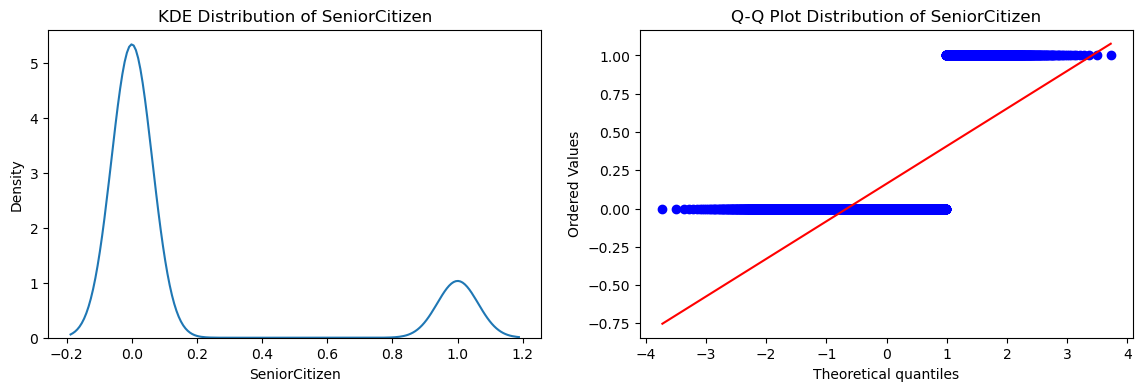

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(df['SeniorCitizen'])
plt.title('KDE Distribution of SeniorCitizen')

plt.subplot(122)
stats.probplot(df['SeniorCitizen'], dist= 'norm', plot = plt)
plt.title('Q-Q Plot Distribution of SeniorCitizen')

plt.show()

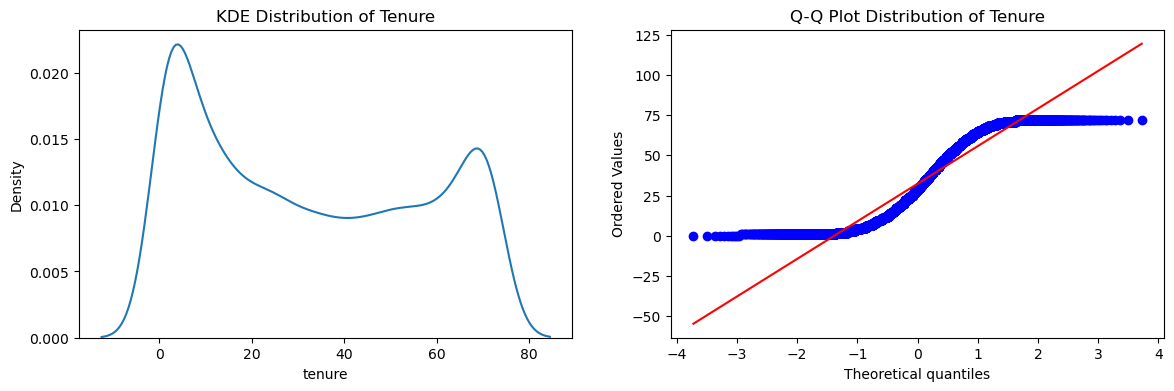

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(df['tenure'])
plt.title('KDE Distribution of Tenure')

plt.subplot(122)
stats.probplot(df['tenure'], dist= 'norm', plot = plt)
plt.title('Q-Q Plot Distribution of Tenure')

plt.show()

In [12]:
df['TotalCharges'].dtype

dtype('O')

In [13]:
df['TotalCharges'] = df['TotalCharges'].str.strip()

In [14]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [15]:
df['TotalCharges'].isnull().sum()

np.int64(11)

In [16]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [17]:
df['TotalCharges'].isnull().sum()

np.int64(0)

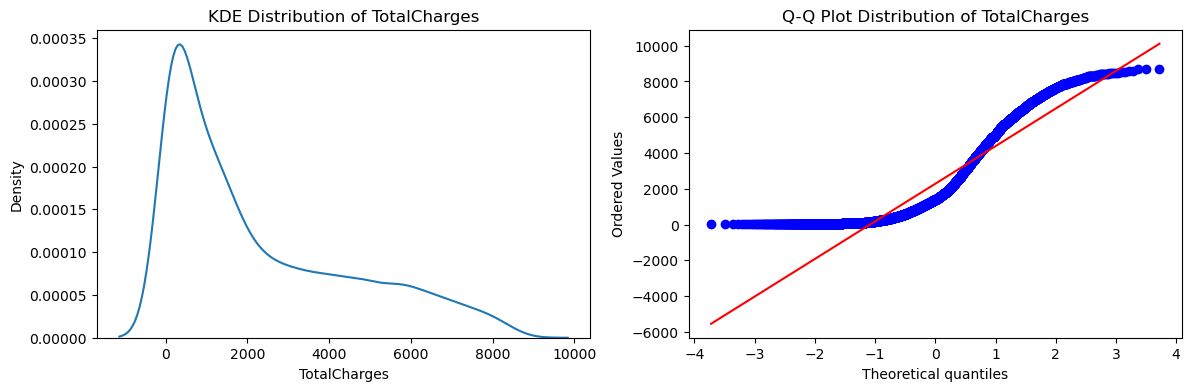

In [66]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(df['TotalCharges'])
plt.title('KDE Distribution of TotalCharges')

plt.subplot(122)
stats.probplot(df['TotalCharges'], dist= 'norm', plot = plt)
plt.title('Q-Q Plot Distribution of TotalCharges')

plt.show()

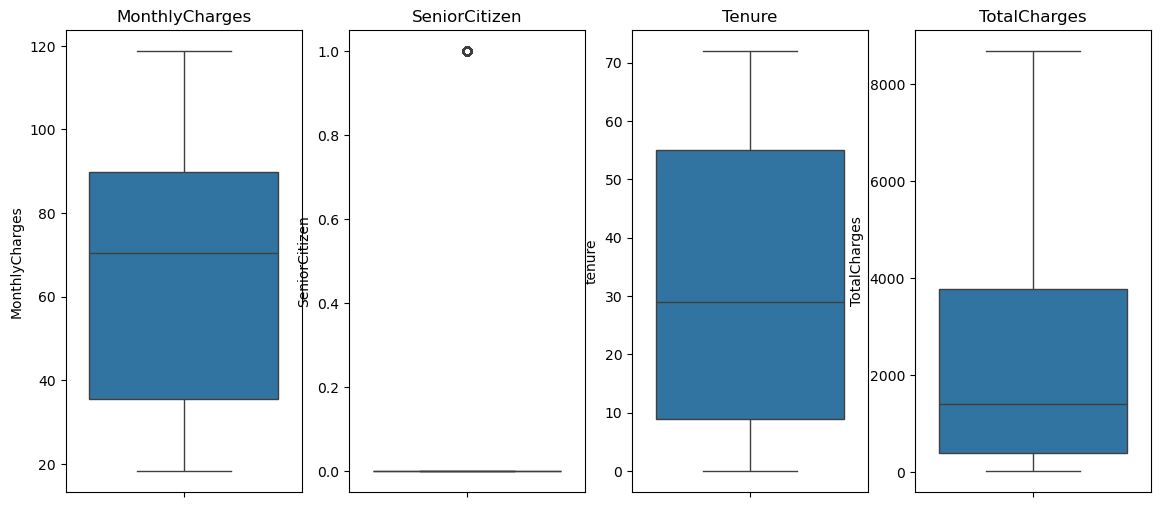

In [19]:
plt.figure(figsize=(14,6))

plt.subplot(141)
sns.boxplot(df['MonthlyCharges'])
plt.title('MonthlyCharges')

plt.subplot(142)
sns.boxplot(df['SeniorCitizen'])
plt.title('SeniorCitizen')

plt.subplot(143)
sns.boxplot(df['tenure'])
plt.title('Tenure')

plt.subplot(144)
sns.boxplot(df['TotalCharges'])
plt.title('TotalCharges')

plt.show()


In [20]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn', axis = 1), df.iloc[:, -1], test_size = 0.2, random_state = 42)

In [21]:
X_train.shape

(5634, 19)

In [22]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scalar', StandardScaler())
])


In [23]:
clmf = make_column_transformer(
    (num_pipeline, ['tenure','MonthlyCharges','TotalCharges']),
    (OneHotEncoder(drop = 'first', sparse_output= False, handle_unknown = 'ignore'),
        ['gender','Partner','Dependents','PhoneService','MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup',
        'DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']), remainder = 'passthrough')

In [40]:
le = LabelEncoder()
y_train_labeled = le.fit_transform(y_train)
y_test_labeled = le.transform(y_test)

In [41]:
y_train_labeled

array([0, 0, 1, ..., 0, 1, 0])

In [42]:
X_train_transform = clmf.fit_transform(X_train)
X_test_transform = clmf.transform(X_test)

In [49]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train_transform, y_train_labeled)

y_pred = dtc.predict(X_test_transform)

accuracy_score(y_test_labeled, y_pred)

0.7111426543647977

In [50]:
cross_val_score(DecisionTreeClassifier(), X_train_transform, y_train_labeled)

array([0.72138421, 0.70984916, 0.73114463, 0.71783496, 0.72557726])

In [45]:
lr = LogisticRegression()

lr.fit(X_train_transform, y_train_labeled)
y_pred1 = lr.predict(X_test_transform)

accuracy_score(y_test_labeled, y_pred1)

0.8218594748048261

In [59]:
print(confusion_matrix(y_test_labeled, y_pred1))
print(classification_report(y_test_labeled, y_pred1))

[[934 102]
 [149 224]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

